# Machine Learning Classifiers Using scikit-learn

"No Free Lunch Theorem" by David H. Wolpert

No single classifier works best across all possible scenarios

## 5 main steps that are involved in training a supervised machine learning algorithm can be summarized as follows:

- Selecting features and collecting labeled training examples.
- Choosing a performance metric.
- Choosing a classifier and optimization of algorithm.
- Evaluating the performance of the model.
- Tuning the algorithm.

## First steps with scikit-learn - training a perceptron

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 13,
    stratify = y 
)

### Important Note

Please notice that 'stratify' returns training and test subsets that have the same proportion of class labels as the input dataset.

We can use NumPy's "bincount" function, which counts the number of occurrences of each value in an array, to verifu that this is indeed the case

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [35 35 35]


## Feature Scaling using `StandardScaler`

### Procedure:

1. StandardScaler object needs to be created.
2. `fit` method shall be used on the created object in order to estimate the following parameters for each feature dimension from the training data:
    - sample mean
    - standard deviation
3. `transform` method will then standardized the training data using those estimated parameters.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # StandardScaler object
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training preceptron model

Most alforithms in scikit-learn aleady support multiclass classification by default via the **one-vs.-rest (OvR)** method.

`Perceptron` class will be created with the following parameters:
- eta0: learning rate
- random_state

Please note that the learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorith will require more epochs until convergence, which can make the learning slow (especially for large datasets)


In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(
    eta0 = 0.1,
    random_state = 13
    )

ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=13, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Making Predictions
The `predict` method will be used to make such predictions.

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 14


## Performance Metrics

Scikit-learn has a `metrics` module with a large variety of different performance metrics.

There are two ways of computing the accuracy of the perceptron:
- performing the `accuracy_score` function on the test labels and the predicted labels
- performing the `score` method on model itself which combines the `predict` call with `accuracy_score`


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.689
Accuracy: 0.689


## Plotting the decision regions

This is done in order to visualize how well it separates the different flower examples.

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):

    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx2.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x = X[y == cl, 0],
            y = X[y == cl, 1],
            alpha = 0.8,
            c = colors[idx],
            marker = markers[idx],
            label = cl,
            edgecolor = 'black'
        )

    # highlight test examples
    if test_idx:
        #plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            alpha = 1.0,
            linewidth = 1,
            marker = 'o',
            s = 100,
            label = 'test set',
            edgecolor = 'black'  
        )


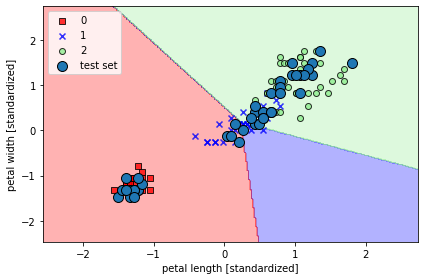

In [16]:
# Plotting

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X = X_combined_std,
    y = y_combined,
    classifier = ppn,
    test_idx = range(105, 150)
)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()